In [1]:
import argparse
import logging
import random
import typing


import torch
from mmf.common.registry import registry
from mmf.utils.build import build_config, build_trainer
from mmf.utils.configuration import Configuration
from mmf.utils.distributed import distributed_init, get_rank, infer_init_method, is_xla
from mmf.utils.env import set_seed, setup_imports
from mmf.utils.flags import flags
from mmf.utils.general import log_device_names
from mmf.utils.logger import setup_logger, setup_very_basic_config
from mmf.trainers.mmf_trainer import MMFTrainer

setup_very_basic_config()

C:\ProgramData\Anaconda3\envs\mmf\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\ProgramData\Anaconda3\envs\mmf\lib\site-packages\torchaudio\backend\utils.py:67: UserWarning: No audio backend is available.
  warnings.warn('No audio backend is available.')


In [55]:
import numpy as np
from tqdm import tqdm
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [3]:
def main(configuration, init_distributed=False, predict=False):
    print('main')
    # A reload might be needed for imports
    setup_imports()
    configuration.import_user_dir()
    config = configuration.get_config()

    
    if torch.cuda.is_available():
        torch.cuda.set_device(config.device_id)
        torch.cuda.init()

    if init_distributed:
        distributed_init(config)

    seed = config.training.seed
    config.training.seed = set_seed(seed if seed == -1 else seed + get_rank())
    registry.register("seed", config.training.seed)

    config = build_config(configuration)

    setup_logger(
        color=config.training.colored_logs, disable=config.training.should_not_log
    )
    logger = logging.getLogger("mmf_cli.run")
    # Log args for debugging purposes
    logger.info(configuration.args)
    logger.info(f"Torch version: {torch.__version__}")
    log_device_names()
    logger.info(f"Using seed {config.training.seed}")

    print('predict:',predict)
    print('config:',config)#['dataset_config']
    print(config['dataset_config']['hateful_memes']['data_dir'])
    
    
    
    trainer = MMFTrainer(config) #build_trainer(config)
    trainer.load()
    
    return trainer
    #if predict:
    #    trainer.inference()
    #else:
    #    trainer.train()


def distributed_main(device_id, configuration, predict=False):
    config = configuration.get_config()
    config.device_id = device_id

    if config.distributed.rank is None:
        config.distributed.rank = config.start_rank + device_id

    main(configuration, init_distributed=True, predict=predict)


In [4]:
def run(opts: typing.Optional[typing.List[str]] = None, predict: bool = False):
    print('run')
    """Run starts a job based on the command passed from the command line.
    You can optionally run the mmf job programmatically by passing an optlist as opts.

    Args:
        opts (typing.Optional[typing.List[str]], optional): Optlist which can be used.
            to override opts programmatically. For e.g. if you pass
            opts = ["training.batch_size=64", "checkpoint.resume=True"], this will
            set the batch size to 64 and resume from the checkpoint if present.
            Defaults to None.
        predict (bool, optional): If predict is passed True, then the program runs in
            prediction mode. Defaults to False.
    """
    setup_imports()

    opts = ['config=config.yaml', 
            'model=E:\\coding\\MADE-graduation-projects\\hateful_memes3\\SOTA\\mmf\\visual_bert\\predict\\visual_bert', 
            'checkpoint.resume_file=E:\\coding\\MADE-graduation-projects\\hateful_memes3\\SOTA\\mmf\\visual_bert\\predict\\visual_bert.ckpt',
            'checkpoint.resume_pretrained=False',
            'run_type=val',
            'dataset=hateful_memes',
            'evaluation.predict=true']
    if opts is None:
        parser = flags.get_parser()
        args = parser.parse_args()
    else:
        args = argparse.Namespace(config_override=None)
        args.opts = opts

        
    print('********************************')
    print(args)
    print('********************************')
    
    configuration = Configuration(args)
    # Do set runtime args which can be changed by MMF
    configuration.args = args
    config = configuration.get_config()
    config.start_rank = 0
    if config.distributed.init_method is None:
        infer_init_method(config)

    config.device_id = 0
    return main(configuration, predict=predict)


In [5]:
mmfTrainer = run(predict=True)

run
********************************
Namespace(config_override=None, opts=['config=config.yaml', 'model=visual_bert', 'checkpoint.resume_file=E:\\coding\\MADE-graduation-projects\\hateful_memes3\\SOTA\\mmf\\visual_bert\\predict\\visual_bert.ckpt', 'checkpoint.resume_pretrained=False', 'run_type=val', 'dataset=hateful_memes', 'evaluation.predict=true'])
********************************
2022-10-15T11:56:16 | mmf.utils.configuration: Overriding option config to config.yaml
2022-10-15T11:56:16 | mmf.utils.configuration: Overriding option model to visual_bert
2022-10-15T11:56:16 | mmf.utils.configuration: Overriding option checkpoint.resume_file to E:\coding\MADE-graduation-projects\hateful_memes3\SOTA\mmf\visual_bert\predict\visual_bert.ckpt
2022-10-15T11:56:16 | mmf.utils.configuration: Overriding option checkpoint.resume_pretrained to False
2022-10-15T11:56:16 | mmf.utils.configuration: Overriding option run_type to val
2022-10-15T11:56:16 | mmf.utils.configuration: Overriding option dat

C:\ProgramData\Anaconda3\envs\mmf\lib\site-packages\omegaconf\grammar_visitor.py:257: UserWarning: In the sequence `MMF_USER_DIR,` some elements are missing: please replace them with empty quoted strings. See https://github.com/omry/omegaconf/issues/572 for details.
  category=UserWarning,
C:\ProgramData\Anaconda3\envs\mmf\lib\site-packages\omegaconf\grammar_visitor.py:257: UserWarning: In the sequence `MMF_LOG_DIR,` some elements are missing: please replace them with empty quoted strings. See https://github.com/omry/omegaconf/issues/572 for details.
  category=UserWarning,
C:\ProgramData\Anaconda3\envs\mmf\lib\site-packages\omegaconf\grammar_visitor.py:257: UserWarning: In the sequence `MMF_REPORT_DIR,` some elements are missing: please replace them with empty quoted strings. See https://github.com/omry/omegaconf/issues/572 for details.
  category=UserWarning,
C:\ProgramData\Anaconda3\envs\mmf\lib\site-packages\omegaconf\grammar_visitor.py:257: UserWarning: In the sequence `MMF_TENSOR

2022-10-15T11:56:22 | mmf.datasets.multi_datamodule: Multitasking disabled by default for single dataset training
2022-10-15T11:56:22 | mmf.datasets.multi_datamodule: Multitasking disabled by default for single dataset training
2022-10-15T11:56:22 | mmf.datasets.multi_datamodule: Multitasking disabled by default for single dataset training
2022-10-15T11:56:22 | mmf.trainers.mmf_trainer: Loading model


Model config BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "bert_model_name": "bert-base-uncased",
  "bypass_transformer": false,
  "classifier_dropout": null,
  "embedding_strategy": "plain",
  "finetune_lr_multiplier": 1,
  "freeze_base": false,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "losses": [
    "cross_entropy"
  ],
  "max_position_embeddings": 512,
  "model": "visual_bert",
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_strategy": "default",
  "position_embedding_type": "absolute",
  "random_initialize": false,
  "special_visual_initialize": true,
  "training_head_type": "classification",
  "transformers_version": "4.10.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "visual_embedding_dim": 2048,
  "vocab_size": 30522,
  "zerobias": false
}

loading

2022-10-15T11:56:24 | mmf.trainers.mmf_trainer: Loading optimizer
*** {'config_version': 1.0, 'training': {'trainer': 'base_trainer', 'seed': 48053078, 'experiment_name': 'run', 'max_updates': 22000, 'max_epochs': None, 'log_interval': 100, 'logger_level': 'info', 'log_format': 'simple', 'log_detailed_config': False, 'should_not_log': False, 'colored_logs': True, 'tensorboard': False, 'cudnn_benchmark': False, 'wandb': {'enabled': False, 'entity': None, 'project': 'mmf', 'name': 'run', 'log_checkpoint': False}, 'batch_size': 32, 'batch_size_per_device': None, 'update_frequency': 1, 'num_workers': 4, 'fast_read': False, 'dataset_size_proportional_sampling': True, 'pin_memory': False, 'persistent_workers': True, 'checkpoint_interval': 1000, 'evaluation_interval': 1000, 'clip_gradients': False, 'clip_norm_mode': 'all', 'early_stop': {'enabled': False, 'patience': 4000, 'criteria': 'hateful_memes/roc_auc', 'minimize': False}, 'lr_scheduler': True, 'lr_steps': [], 'lr_ratio': 0.1, 'use_warm

In [6]:
mmfTrainer

In [7]:
mmfTrainer.model

VisualBERT(
  (model): VisualBERTForClassification(
    (bert): VisualBERTBase(
      (embeddings): BertVisioLinguisticEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (token_type_embeddings_visual): Embedding(2, 768)
        (position_embeddings_visual): Embedding(512, 768)
        (projection): Linear(in_features=2048, out_features=768, bias=True)
      )
      (encoder): BertEncoderJit(
        (layer): ModuleList(
          (0): BertLayerJit(
            (attention): BertAttentionJit(
              (self): BertSelfAttentionJit(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768

In [8]:
for batch in mmfTrainer.val_loader:
    break

In [9]:
batch

SampleList([('text',
             [['[CLS]',
               'this',
               'is',
               'how',
               'muslims',
               'celebrate',
               'new',
               'year',
               '[SEP]'],
              ['[CLS]',
               '"',
               'white',
               'privilege',
               'the',
               'privilege',
               'of',
               'being',
               'called',
               '"',
               'racist',
               '"',
               'by',
               'other',
               'people',
               'who',
               'see',
               'nothing',
               'else',
               'about',
               'you',
               'except',
               'the',
               'color',
               'of',
               'your',
               'skin',
               '[SEP]'],
              ['[CLS]',
               'this',
               'is',
               'el',
               'paso',


In [10]:
mmfTrainer.model.eval()
mmfTrainer.model.is_pretrained = True

In [11]:
output = mmfTrainer.model(batch)
output['scores']. shape, output

(torch.Size([32, 2]),
 {'scores': tensor([[-1.9652,  2.2588],
          [-0.5820,  0.8837],
          [ 1.7229, -1.3728],
          [-0.6181,  0.9476],
          [-0.1846,  0.5312],
          [ 2.9235, -2.6131],
          [ 2.9263, -2.6025],
          [ 3.0973, -2.7509],
          [ 0.8812, -0.6781],
          [ 2.8912, -2.6081],
          [ 2.7876, -2.4027],
          [ 1.9322, -1.5507],
          [-1.6714,  1.9194],
          [ 1.1140, -0.7994],
          [ 3.3113, -3.0766],
          [-0.1404,  0.5504],
          [ 2.3809, -1.9829],
          [ 2.2307, -1.8013],
          [-0.3224,  0.6256],
          [ 0.3008,  0.0973],
          [ 2.0127, -1.5380],
          [ 2.7730, -2.4408],
          [ 1.7459, -1.4245],
          [ 2.3861, -2.0493],
          [ 2.1849, -1.8580],
          [ 1.6572, -1.2823],
          [ 0.2470,  0.0945],
          [ 3.4876, -3.3203],
          [ 1.4887, -1.1508],
          [ 2.1542, -1.7719],
          [-1.3419,  1.5763],
          [ 0.0614,  0.2137]], grad_fn

In [12]:
mmfTrainer.model.model.classifier = torch.nn.Sequential(*[mmfTrainer.model.model.classifier[i] for i in range(len(mmfTrainer.model.model.classifier) - 1)])

In [13]:
output = mmfTrainer.model(batch)
output['scores'].shape

torch.Size([12288, 2])

In [14]:
result = output['scores'].flatten().reshape((32, 768))

In [15]:
result.shape

torch.Size([32, 768])

In [32]:
def get_features(model, dataloader, out_features):
    all_features = []
    all_labels = []
    
    with torch.no_grad():
        for batch in tqdm(dataloader):
            
            output = model(batch)
            batch_size = batch['targets'].shape[0]
            features = output['scores'].flatten().reshape((batch_size, out_features))
            labels = batch['targets']
            
            
            all_features.extend(features)
            all_labels.extend(labels)

    return all_features, all_labels

In [33]:
features_val, labels_val = get_features(mmfTrainer.model, mmfTrainer.val_loader, 768)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [02:25<00:00,  9.10s/it]


In [37]:
features_train, labels_train = get_features(mmfTrainer.model, mmfTrainer.train_loader, 768)

100%|████████████████████████████████████████████████████████████████████████████████| 266/266 [45:13<00:00, 10.20s/it]


In [46]:
class FeaturesDataset(torch.utils.data.Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
            
    def __getitem__(self, index: int):            
        return self.features[index], self.labels[index]
    
    def __len__(self):
        return len(self.features)

In [47]:
features_train_dataset = FeaturesDataset(features_train, labels_train)
features_val_dataset = FeaturesDataset(features_val, labels_val)

In [38]:

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']


def train_model(model, train_loader, val_loader, loss, optimizer, num_epochs, scheduler):    
    best_model_name = None
    loss_history = []
    train_history = []
    val_history = []
    top_val_accuracy = 0.64 
    for epoch in range(num_epochs):
        model.train()
        loss_accum = 0
        correct_samples = 0
        total_samples = 0
        for i_step, (x, y) in enumerate(train_loader):
            x=x.type(torch.float).cpu()
            y = y.type(torch.float).cpu()
            model = model.cpu()
            prediction = model(x)    
            loss_value = loss(prediction, y.type(torch.long))
            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()
            
            _, indices = torch.max(prediction, 1)
            correct_samples += torch.sum(indices == y)
            total_samples += y.shape[0]
            
            loss_accum += loss_value

        ave_loss = loss_accum / (i_step + 1)
        train_accuracy = float(correct_samples) / total_samples
        val_accuracy = compute_accuracy(model, val_loader)
        
        loss_history.append(float(ave_loss))
        train_history.append(train_accuracy)
        val_history.append(val_accuracy)
        if scheduler != None:
            scheduler.step()

        print("Epoch: %i lr: %f; Average loss: %f, Train accuracy: %f, Val accuracy: %f" % (epoch, get_lr(optimizer), ave_loss, train_accuracy, val_accuracy))

  
        if val_accuracy > top_val_accuracy:
            top_val_accuracy = val_accuracy
            model_name = f'classifier_{epoch}_{round(val_accuracy, 3)}.ckpt'
            best_model_name = model_name
            torch.save(model, open(model_name, 'wb'))
            print("saved", model_name)

    return loss_history, train_history, val_history, best_model_name
        
    
def compute_accuracy(model, loader):
    """
    Computes accuracy on the dataset wrapped in a loader    
    Returns: accuracy as a float value between 0 and 1
    """
    model.eval()
    correct_samples = 0
    total_samples = 0 
    for i_step, (x, y) in enumerate(loader):
        prediction = model(x)
        _, indices = torch.max(prediction, 1)
        correct_samples += torch.sum(indices == y)
        total_samples += y.shape[0]            

    val_accuracy = float(correct_samples) / total_samples
         
    return val_accuracy

In [39]:
input_shape = features_train[0].shape[0]
num_classes = 2

In [48]:
torch.manual_seed(1024)

shape = 256
nn_model = nn.Sequential(
            nn.Linear(input_shape, shape),
            nn.Dropout(0.66),
            nn.BatchNorm1d(shape),
            nn.ReLU(inplace=True),    
    
            nn.Linear(shape, shape),
            nn.Dropout(0.66),
            nn.BatchNorm1d(shape),
            nn.ReLU(inplace=True),    
    
            nn.Linear(shape, num_classes),
            )

print(nn_model)
loss = nn.CrossEntropyLoss().cpu()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=1e-2)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.8)

loss_history, train_history, val_history, best_model_name = train_model(
    nn_model, 
    DataLoader(features_train_dataset, batch_size=500),
    DataLoader(features_val_dataset, batch_size=500),
    loss, optimizer, 300, scheduler)
print('end!')


Sequential(
  (0): Linear(in_features=768, out_features=256, bias=True)
  (1): Dropout(p=0.66, inplace=False)
  (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): ReLU(inplace=True)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): Dropout(p=0.66, inplace=False)
  (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU(inplace=True)
  (8): Linear(in_features=256, out_features=2, bias=True)
)
Epoch: 0 lr: 0.010000; Average loss: 0.230106, Train accuracy: 0.901529, Val accuracy: 0.650000
saved classifier_0_0.65.ckpt
Epoch: 1 lr: 0.010000; Average loss: 0.156171, Train accuracy: 0.947765, Val accuracy: 0.648000
Epoch: 2 lr: 0.010000; Average loss: 0.152084, Train accuracy: 0.949176, Val accuracy: 0.646000
Epoch: 3 lr: 0.010000; Average loss: 0.149656, Train accuracy: 0.949294, Val accuracy: 0.650000
Epoch: 4 lr: 0.010000; Average loss: 0.146851, Train accuracy: 0.948000, Val accuracy: 0.64

Epoch: 79 lr: 0.001678; Average loss: 0.133188, Train accuracy: 0.951059, Val accuracy: 0.638000
Epoch: 80 lr: 0.001678; Average loss: 0.135140, Train accuracy: 0.951882, Val accuracy: 0.644000
Epoch: 81 lr: 0.001678; Average loss: 0.134743, Train accuracy: 0.951882, Val accuracy: 0.632000
Epoch: 82 lr: 0.001678; Average loss: 0.133412, Train accuracy: 0.952118, Val accuracy: 0.640000
Epoch: 83 lr: 0.001678; Average loss: 0.135402, Train accuracy: 0.951412, Val accuracy: 0.636000
Epoch: 84 lr: 0.001678; Average loss: 0.132200, Train accuracy: 0.952353, Val accuracy: 0.634000
Epoch: 85 lr: 0.001678; Average loss: 0.133446, Train accuracy: 0.951765, Val accuracy: 0.630000
Epoch: 86 lr: 0.001678; Average loss: 0.134436, Train accuracy: 0.953882, Val accuracy: 0.628000
Epoch: 87 lr: 0.001678; Average loss: 0.131609, Train accuracy: 0.953765, Val accuracy: 0.628000
Epoch: 88 lr: 0.001678; Average loss: 0.135322, Train accuracy: 0.951765, Val accuracy: 0.628000
Epoch: 89 lr: 0.001342; Averag

Epoch: 163 lr: 0.000281; Average loss: 0.125992, Train accuracy: 0.954824, Val accuracy: 0.620000
Epoch: 164 lr: 0.000281; Average loss: 0.122243, Train accuracy: 0.956353, Val accuracy: 0.618000
Epoch: 165 lr: 0.000281; Average loss: 0.126523, Train accuracy: 0.956706, Val accuracy: 0.622000
Epoch: 166 lr: 0.000281; Average loss: 0.126486, Train accuracy: 0.956235, Val accuracy: 0.626000
Epoch: 167 lr: 0.000281; Average loss: 0.123257, Train accuracy: 0.957176, Val accuracy: 0.624000
Epoch: 168 lr: 0.000281; Average loss: 0.128550, Train accuracy: 0.955882, Val accuracy: 0.624000
Epoch: 169 lr: 0.000225; Average loss: 0.124744, Train accuracy: 0.955529, Val accuracy: 0.622000
Epoch: 170 lr: 0.000225; Average loss: 0.123756, Train accuracy: 0.956353, Val accuracy: 0.622000
Epoch: 171 lr: 0.000225; Average loss: 0.124195, Train accuracy: 0.955765, Val accuracy: 0.624000
Epoch: 172 lr: 0.000225; Average loss: 0.125685, Train accuracy: 0.955882, Val accuracy: 0.620000
Epoch: 173 lr: 0.000

Epoch: 247 lr: 0.000047; Average loss: 0.122569, Train accuracy: 0.956471, Val accuracy: 0.622000
Epoch: 248 lr: 0.000047; Average loss: 0.121995, Train accuracy: 0.956000, Val accuracy: 0.620000
Epoch: 249 lr: 0.000038; Average loss: 0.121446, Train accuracy: 0.956471, Val accuracy: 0.622000
Epoch: 250 lr: 0.000038; Average loss: 0.122532, Train accuracy: 0.955882, Val accuracy: 0.622000
Epoch: 251 lr: 0.000038; Average loss: 0.125295, Train accuracy: 0.956706, Val accuracy: 0.622000
Epoch: 252 lr: 0.000038; Average loss: 0.121249, Train accuracy: 0.956941, Val accuracy: 0.622000
Epoch: 253 lr: 0.000038; Average loss: 0.123681, Train accuracy: 0.957059, Val accuracy: 0.622000
Epoch: 254 lr: 0.000038; Average loss: 0.122659, Train accuracy: 0.955765, Val accuracy: 0.622000
Epoch: 255 lr: 0.000038; Average loss: 0.123652, Train accuracy: 0.956471, Val accuracy: 0.622000
Epoch: 256 lr: 0.000038; Average loss: 0.123675, Train accuracy: 0.956824, Val accuracy: 0.622000
Epoch: 257 lr: 0.000

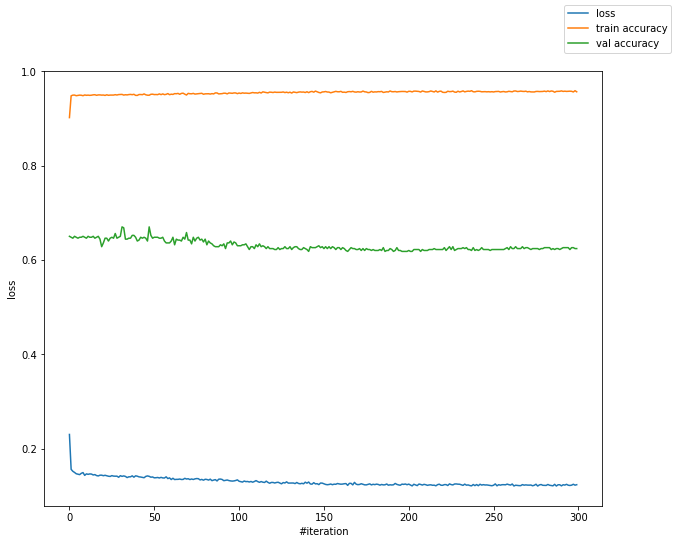

In [51]:
fig = plt.figure(figsize=(10, 8))    
plt.xlabel("#iteration")
plt.ylabel("loss")
plt.plot(loss_history, label='loss')
plt.plot(train_history, label='train accuracy')
plt.plot(val_history, label='val accuracy')
fig.legend()
plt.show()

In [53]:
print("best model:", best_model_name)
best_model = torch.load(open(best_model_name, 'rb'))


best model: classifier_31_0.67.ckpt


In [57]:
best_model.eval()
for i_step, (x, y) in enumerate(DataLoader(features_val_dataset, batch_size=5000)):
    prediction = best_model(x)

acc_score = accuracy_score(np.array([x.item() for x in labels_val]), torch.max(prediction, 1)[1])
auc_score = roc_auc_score(np.array([x.item() for x in labels_val]), prediction[:,1].detach().numpy())
print(acc_score, auc_score)

0.67 0.719472


0.719472


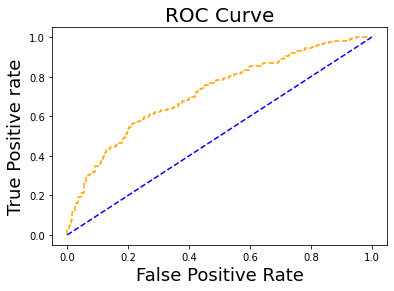

In [58]:
fpr, tpr, thresh = roc_curve(labels_val, prediction[:,1].detach().numpy(), pos_label=1)

random_probs = [0 for i in range(len(labels_val))]
p_fpr, p_tpr, _ = roc_curve(labels_val, random_probs, pos_label=1)
auc_score = roc_auc_score(labels_val, prediction[:,1].detach().numpy())
print(auc_score)

plt.plot(fpr, tpr, linestyle='--',color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC Curve', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive rate',fontsize=18)

plt.show();